In [1]:
!pip install seaborn

You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
train_dir = '../dataset/train/train.csv'

In [5]:
raw_train = pd.read_csv(train_dir)

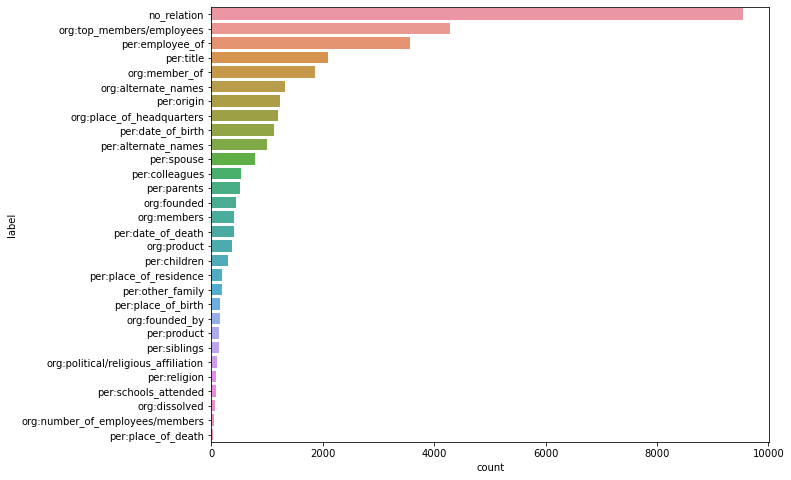

In [11]:
fig, ax = plt.subplots(1,1, figsize=(10, 8))
sns.countplot(y='label', data=raw_train, order = train['label'].value_counts().index)
plt.show()

In [6]:
# 완전히 일치하는 중복 데이터 삭제(1개 행만 남김)
train = raw_train.drop_duplicates(['sentence', 'subject_entity','object_entity', 'label'])

In [7]:
# label만 다른 데이터 확인
dup_input = train[train.duplicated(['sentence', 'subject_entity','object_entity'],keep=False) == True]
dup_input = dup_input.sort_values(by=['sentence', 'label'])
print(len(dup_input))
dup_input

10


,id,sentence,subject_entity,object_entity,label,source
6749,6749,대한항공은 5일 조양호 회장의 3자녀가 보유한 싸이버스카이 주식 9만9900주 전량...,"{'word': '대한항공', 'start_idx': 0, 'end_idx': 3,...","{'word': '조양호', 'start_idx': 9, 'end_idx': 11,...",no_relation,wikipedia
12829,12829,대한항공은 5일 조양호 회장의 3자녀가 보유한 싸이버스카이 주식 9만9900주 전량...,"{'word': '대한항공', 'start_idx': 0, 'end_idx': 3,...","{'word': '조양호', 'start_idx': 9, 'end_idx': 11,...",org:top_members/employees,wikipedia
8364,8364,배우 김병철 씨가 연기하는 정복동은 천리마마트를 망하게 하기 위해 여러 계획을 세우...,"{'word': '정복동', 'start_idx': 15, 'end_idx': 17...","{'word': '김병철', 'start_idx': 3, 'end_idx': 5, ...",no_relation,wikitree
32299,32299,배우 김병철 씨가 연기하는 정복동은 천리마마트를 망하게 하기 위해 여러 계획을 세우...,"{'word': '정복동', 'start_idx': 15, 'end_idx': 17...","{'word': '김병철', 'start_idx': 3, 'end_idx': 5, ...",per:alternate_names,wikitree
22258,22258,"영화 '버즈 오브 프레이'는 배트맨이 없는 고담시에서 할리퀸, 헌트리스, 블랙 카나...","{'word': '배트맨', 'start_idx': 16, 'end_idx': 18...","{'word': '고담시', 'start_idx': 24, 'end_idx': 26...",no_relation,wikitree
11511,11511,"영화 '버즈 오브 프레이'는 배트맨이 없는 고담시에서 할리퀸, 헌트리스, 블랙 카나...","{'word': '배트맨', 'start_idx': 16, 'end_idx': 18...","{'word': '고담시', 'start_idx': 24, 'end_idx': 26...",per:place_of_residence,wikitree
277,277,"이날 프로그램 공개에서는 전북영산작법보존회와 김명신‧정상희의 사제동행 판소리, 관악...","{'word': '강태환', 'start_idx': 62, 'end_idx': 64...","{'word': '색소폰', 'start_idx': 58, 'end_idx': 60...",no_relation,wikitree
3296,3296,"이날 프로그램 공개에서는 전북영산작법보존회와 김명신‧정상희의 사제동행 판소리, 관악...","{'word': '강태환', 'start_idx': 62, 'end_idx': 64...","{'word': '색소폰', 'start_idx': 58, 'end_idx': 60...",per:title,wikitree
4212,4212,한편 전라남도는 최근 확진자가 발생한 순천시와 여수시에 마스크를 각각 2만장씩 총 ...,"{'word': '전라남도', 'start_idx': 3, 'end_idx': 6,...","{'word': '여수시', 'start_idx': 26, 'end_idx': 28...",org:members,wikitree
25094,25094,한편 전라남도는 최근 확진자가 발생한 순천시와 여수시에 마스크를 각각 2만장씩 총 ...,"{'word': '전라남도', 'start_idx': 3, 'end_idx': 6,...","{'word': '여수시', 'start_idx': 26, 'end_idx': 28...",org:place_of_headquarters,wikitree


In [8]:
# 앞쪽에 no_relation 데이터만 삭제함(4212번째 여수시 데이터 삭제되는 점 유의!)
cleaned_train = train.drop_duplicates(['sentence', 'subject_entity','object_entity'], keep='last')

In [9]:
# 정제된 최종 데이터 개수
len(cleaned_train)

32423

In [10]:
# 삭제된 데이터 개수
len(raw_train) - len(cleaned_train)

47

In [11]:
# 삭제된 <"label"만 상이한 데이터>의 개수
len(train) - len(cleaned_train)

5

In [13]:
yeosu = cleaned_train[cleaned_train['object_entity'].str.contains('여수시')]
print(len(yeosu))
yeosu

10


,id,sentence,subject_entity,object_entity,label,source
944,944,여수시립율촌도서관은 시설물 보강 공사를 위해 올 10월부터 내년 4월까지 7개월간 ...,"{'word': '율촌도서관', 'start_idx': 4, 'end_idx': 8...","{'word': '여수시', 'start_idx': 0, 'end_idx': 2, ...",org:place_of_headquarters,wikitree
1622,1622,여수시립쌍봉도서관이 폐관시간을 오후 6시에서 저녁 10시로 연장한 결과 이용객이 4...,"{'word': '쌍봉도서관', 'start_idx': 4, 'end_idx': 8...","{'word': '여수시', 'start_idx': 0, 'end_idx': 2, ...",org:member_of,wikitree
3019,3019,전라남도의회는 세계가 주목하는 유엔기후변화협약 당사국총회를 여수시를 중심으로 한 남...,"{'word': '전라남도의회', 'start_idx': 0, 'end_idx': ...","{'word': '여수시', 'start_idx': 33, 'end_idx': 35...",org:place_of_headquarters,wikitree
8639,8639,한편 전라남도는 지난해 녹색자금 19억원을 지원받아 ‘무장애나눔길 조성사업’으로 여...,"{'word': '전라남도', 'start_idx': 3, 'end_idx': 6,...","{'word': '여수시', 'start_idx': 143, 'end_idx': 1...",no_relation,wikitree
10709,10709,또한 “마을기업을 운영하면서 힘들 때 마다 다독여주신 박금옥 당시 여수시청 인구일자...,"{'word': '쌍봉도서관', 'start_idx': 64, 'end_idx': ...","{'word': '여수시', 'start_idx': 37, 'end_idx': 39...",org:place_of_headquarters,policy_briefing
22856,22856,"전남대를 비롯해 여수교육지원청, 여수시, 한영대학교, 여수상공회의소, 여수산업단지공...","{'word': '전라남도', 'start_idx': 63, 'end_idx': 6...","{'word': '여수시', 'start_idx': 18, 'end_idx': 20...",org:members,wikitree
23365,23365,"전라남도는 지난 3월 3회에 걸쳐 여수시와 완도군에서 주말을 이용, 드라이브스루 방...","{'word': '전라남도', 'start_idx': 0, 'end_idx': 3,...","{'word': '여수시', 'start_idx': 19, 'end_idx': 21...",org:members,wikitree
23626,23626,자세한 사항은 여수시립도서관 홈페이지를 참고하거나 현암도서관(☎659-4798)으로...,"{'word': '현암도서관', 'start_idx': 28, 'end_idx': ...","{'word': '여수시', 'start_idx': 8, 'end_idx': 10,...",org:place_of_headquarters,wikitree
25094,25094,한편 전라남도는 최근 확진자가 발생한 순천시와 여수시에 마스크를 각각 2만장씩 총 ...,"{'word': '전라남도', 'start_idx': 3, 'end_idx': 6,...","{'word': '여수시', 'start_idx': 26, 'end_idx': 28...",org:place_of_headquarters,wikitree
26349,26349,전라남도는 여수시와 순천시에 ‘코로나19’ 확진자가 잇따라 발생해 지역 감염 확산이...,"{'word': '전라남도', 'start_idx': 0, 'end_idx': 3,...","{'word': '여수시', 'start_idx': 6, 'end_idx': 8, ...",org:place_of_headquarters,wikitree


In [29]:
cleaned_train.loc[[1622, 26349],['label']] = 'org:place_of_headquarters'

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [30]:
cleaned_train.loc[[8639, 25094, 26349],['label']] = 'org:members'

In [31]:
cleaned_train[cleaned_train['object_entity'].str.contains('여수시')]

,id,sentence,subject_entity,object_entity,label,source
944,944,여수시립율촌도서관은 시설물 보강 공사를 위해 올 10월부터 내년 4월까지 7개월간 ...,"{'word': '율촌도서관', 'start_idx': 4, 'end_idx': 8...","{'word': '여수시', 'start_idx': 0, 'end_idx': 2, ...",org:place_of_headquarters,wikitree
1622,1622,여수시립쌍봉도서관이 폐관시간을 오후 6시에서 저녁 10시로 연장한 결과 이용객이 4...,"{'word': '쌍봉도서관', 'start_idx': 4, 'end_idx': 8...","{'word': '여수시', 'start_idx': 0, 'end_idx': 2, ...",org:place_of_headquarters,wikitree
3019,3019,전라남도의회는 세계가 주목하는 유엔기후변화협약 당사국총회를 여수시를 중심으로 한 남...,"{'word': '전라남도의회', 'start_idx': 0, 'end_idx': ...","{'word': '여수시', 'start_idx': 33, 'end_idx': 35...",org:place_of_headquarters,wikitree
8639,8639,한편 전라남도는 지난해 녹색자금 19억원을 지원받아 ‘무장애나눔길 조성사업’으로 여...,"{'word': '전라남도', 'start_idx': 3, 'end_idx': 6,...","{'word': '여수시', 'start_idx': 143, 'end_idx': 1...",org:members,wikitree
10709,10709,또한 “마을기업을 운영하면서 힘들 때 마다 다독여주신 박금옥 당시 여수시청 인구일자...,"{'word': '쌍봉도서관', 'start_idx': 64, 'end_idx': ...","{'word': '여수시', 'start_idx': 37, 'end_idx': 39...",org:place_of_headquarters,policy_briefing
22856,22856,"전남대를 비롯해 여수교육지원청, 여수시, 한영대학교, 여수상공회의소, 여수산업단지공...","{'word': '전라남도', 'start_idx': 63, 'end_idx': 6...","{'word': '여수시', 'start_idx': 18, 'end_idx': 20...",org:members,wikitree
23365,23365,"전라남도는 지난 3월 3회에 걸쳐 여수시와 완도군에서 주말을 이용, 드라이브스루 방...","{'word': '전라남도', 'start_idx': 0, 'end_idx': 3,...","{'word': '여수시', 'start_idx': 19, 'end_idx': 21...",org:members,wikitree
23626,23626,자세한 사항은 여수시립도서관 홈페이지를 참고하거나 현암도서관(☎659-4798)으로...,"{'word': '현암도서관', 'start_idx': 28, 'end_idx': ...","{'word': '여수시', 'start_idx': 8, 'end_idx': 10,...",org:place_of_headquarters,wikitree
25094,25094,한편 전라남도는 최근 확진자가 발생한 순천시와 여수시에 마스크를 각각 2만장씩 총 ...,"{'word': '전라남도', 'start_idx': 3, 'end_idx': 6,...","{'word': '여수시', 'start_idx': 26, 'end_idx': 28...",org:members,wikitree
26349,26349,전라남도는 여수시와 순천시에 ‘코로나19’ 확진자가 잇따라 발생해 지역 감염 확산이...,"{'word': '전라남도', 'start_idx': 0, 'end_idx': 3,...","{'word': '여수시', 'start_idx': 6, 'end_idx': 8, ...",org:members,wikitree


In [32]:
# 중복 데이터 확인
check_dup = cleaned_train[cleaned_train.duplicated(['sentence', 'subject_entity','object_entity'],keep=False) == True].sort_values(by=['sentence', 'label'])
len(check_dup)

0

In [33]:
len(cleaned_train)

32423

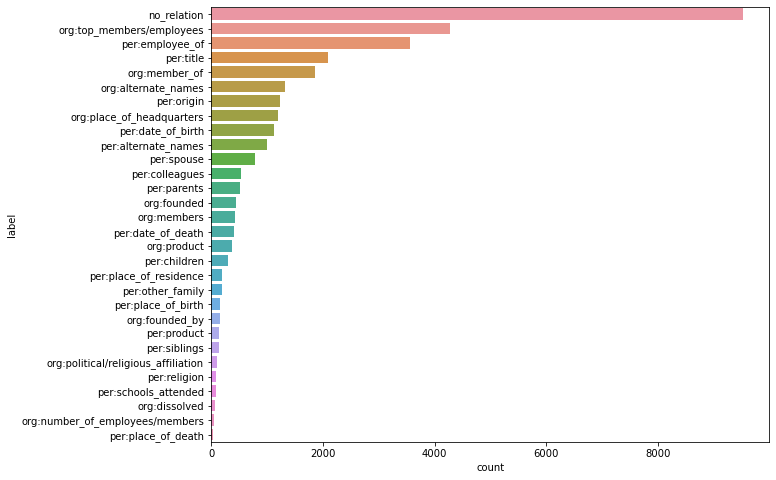

In [118]:
fig, ax = plt.subplots(1,1, figsize=(10, 8))
sns.countplot(y='label', data=cleaned_train, order = train['label'].value_counts().index)
plt.show()

In [34]:
train['label'].value_counts()

no_relation                            9517
org:top_members/employees              4279
per:employee_of                        3567
per:title                              2099
org:member_of                          1864
org:alternate_names                    1318
per:origin                             1234
org:place_of_headquarters              1195
per:date_of_birth                      1130
per:alternate_names                     998
per:spouse                              795
per:colleagues                          534
per:parents                             518
org:founded                             450
org:members                             420
per:date_of_death                       417
org:product                             380
per:children                            304
per:place_of_residence                  193
per:other_family                        190
per:place_of_birth                      166
org:founded_by                          155
per:product                     

In [37]:
cleaned_train.to_csv('../dataset/train/new_train.csv', index=False)

In [36]:
from sklearn.model_selection import train_test_split

new_train, new_dev = train_test_split(cleaned_train, test_size=0.1, random_state=1004, stratify=cleaned_train['label'])
new_train.to_csv('../dataset/train/split_train.csv', index=False)
new_dev.to_csv('../dataset/train/split_dev.csv', index=False)